<a href="https://colab.research.google.com/github/Team-Alpha-Squad/PRISM/blob/master/test/pranav/notebook/African_Recession_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
pd.set_option('display.max_columns', 60)
df = pd.read_csv('https://raw.githubusercontent.com/Team-Alpha-Squad/PRISM/master/test/pranav/data/africa_recession.csv')
df.head(10)

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
0,28.849621,6.914298,0.239667,1.547767,99010.171880,131991.375000,426543.343800,0.009374,0.648979,0.626111,95642.992190,131823.703100,7.039534e+05,0.512764,1.068518,1.008857,0.483403,0.119199,0.043679,10.625636,0.307452,0.309123,0.295914,0.618509,0.250884,0.134649,0.121411,-0.182028,0.056574,0.289768,0.314139,0.388684,0.465633,0.481975,0.278865,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
1,45.728313,13.623806,0.297929,2.086037,316862.656300,374842.343800,804602.250000,0.019658,0.719390,0.657543,308969.156300,379569.906300,1.669636e+06,0.647240,0.973863,0.865942,0.561062,0.108611,0.042740,6.939828,0.348586,0.354220,0.351310,0.670727,0.147136,0.133380,0.135068,-0.130606,0.044295,0.323617,0.385008,0.474147,0.494095,0.520165,0.444091,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
2,33.262043,13.323813,0.400571,1.498783,29762.876950,36584.992190,67072.593750,0.001670,0.308652,0.292607,36392.964840,43032.312500,1.616443e+05,0.399972,0.985717,0.816634,0.506038,0.188336,0.045847,800.408508,0.358321,0.357803,0.351029,0.672994,0.183977,0.129643,0.035281,-0.087737,0.065842,0.368704,0.355546,0.304422,0.501278,0.487623,0.350502,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
3,8.025703,3.869000,0.482076,1.356151,6488.692871,7006.969727,5790.396973,0.000184,0.205865,0.234643,7096.825195,7673.087891,1.014219e+04,0.450355,0.703341,0.730731,0.741010,0.080584,0.048116,389.696228,0.281181,0.293343,0.293662,0.869283,0.087738,0.229176,0.024138,-0.017928,-0.192408,0.292345,0.445609,0.238837,0.470837,0.511137,0.402848,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
4,1.061468,0.243000,0.228928,1.676330,7620.187500,8419.264648,16907.236330,0.000431,0.959765,0.993985,5540.332520,7002.934570,4.100362e+04,1.068165,0.737721,0.752696,0.612079,0.033991,0.057299,6.939828,0.206353,0.235375,0.222508,0.845482,0.102297,0.130042,0.234137,-0.291400,-0.020558,0.200053,0.512144,0.247313,0.487032,0.482645,0.398468,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
5,4.970367,2.227000,0.448055,1.703795,5893.620117,6921.736328,13102.988280,0.000326,0.208088,0.216674,5945.256348,7349.799805,3.110390e+04,0.847564,0.959597,0.919949,0.806201,0.010000,0.030199,711.976257,0.224927,0.241299,0.232987,0.789054,0.160960,0.133639,0.058745,-0.108744,-0.033654,0.226153,0.335147,0.217692,0.511657,0.466357,0.390874,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,1
6,11.607942,4.684148,0.403530,1.069451,11611.430660,13619.139650,20373.242190,0.000481,0.373559,0.373653,11284.044920,12426.498050,2.665401e+04,0.414980,0.850378,0.830406,0.599852,0.089187,0.046962,711.976257,0.216256,0.223170,0.201229,0.738974,0.153458,0.148542,0.028177,-0.119656,0.050506,0.203473,0.263156,0.279848,0.498889,0.462195,0.309431,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
7,16.440924,7.207795,0.438406,1.296941,18216.638670,31415.113280,215671.937500,0.016438,0.125469,0.107790,31842.476560,51165.156250,5.288266e+05,1.212336,0.429515,0.406239,0.284879,0.054978,0.067504,10.040545,0.493611,0.331733,0.347420,0.277223,0.375627,0.241221,0.591017,-0.083334,-0.401753,0.495396,0.108307,0.491560,0.391757,0.493560,0.111272,327.86,223.05,769.06,268.89,289.58,149.37,876.4


#**DATA ANALYSIS**


##Here we will search for any missing values##

In [ ]:
'Dataset contains nulls: {}'.format(data.isnull().any().any())

'Dataset contains nulls: False'

##For consistency, ensure that all column labels of type string##

In [ ]:
all(isinstance(column, str) for column in df.columns)

True

Let's start with quickly reviewing some summary with the help of info() and describe()

In [ ]:
df.describe()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.00000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,20.185755,7.121089,0.357865,1.777389,64361.006942,80885.988722,2.442244e+05,0.004583,0.454419,0.453431,68169.779343,86894.648830,2.960933e+05,0.922019,0.988884,0.956187,0.513159,0.115962,0.048087,447.069460,0.420510,0.425005,0.411562,0.679354,0.206769,0.174061,0.168543,-0.225677,-0.003049,0.430719,0.474535,0.407058,0.623058,0.592560,0.394489,480.433333,315.391667,1205.33000,512.912222,322.411667,221.326667,1009.445556,0.044535,0.030346,0.082411,0.058144,0.024774,0.033930,0.023741,0.078189
std,30.037490,9.921471,0.080541,0.446339,129634.856793,156740.416624,4.725163e+05,0.008210,0.206562,0.203056,136352.268853,164892.302342,5.126251e+05,0.340277,0.143482,0.140860,0.148923,0.073690,0.012163,797.259327,0.126245,0.117072,0.117266,0.158903,0.088993,0.063082,0.142386,0.132546,0.090130,0.136076,0.142659,0.160308,0.104425,0.076358,0.386874,132.323682,65.322380,416.62894,173.040876,44.315222,49.803981,140.125951,0.184025,0.105616,0.288454,0.151285,0.129924,0.127101,0.076937,0.268746
min,1.061468,0.243000,0.198212,1.069451,2781.259277,2984.366943,5.790397e+03,0.000124,0.098622,0.107790,2786.592285,2978.288574,8.735905e+03,0.136824,0.429515,0.382910,0.164316,0.010000,0.024867,1.000000,0.150231,0.146762,0.128689,0.223663,0.049954,0.016554,0.012206,-0.784460,-0.652756,0.154627,0.030470,0.044227,0.375171,0.432636,0.062744,274.690000,205.270000,586.13000,241.900000,245.560000,149.370000,843.660000,-0.359446,-0.173741,-0.477017,-0.157564,-0.174550,-0.225998,-0.113858,0.000000
25%,3.830730,1.048750,0.297922,1.445886,9117.209716,11081.697755,2.429231e+04,0.000514,0.301179,0.295615,8797.567871,10660.792725,3.465814e+04,0.709967,0.946962,0.900594,0.426136,0.063373,0.041254,8.609180,0.338547,0.349186,0.329368,0.594391,0.142124,0.132076,0.059928,-0.299666,-0.034658,0.346740,0.383279,0.299052,0.536308,0.541171,0.294728,355.210000,271.740000,801.96000,331.440000,289.580000,185.770000,899.190000,-0.058931,-0.044322,-0.102940,-0.053405,-0.060792,-0.026451,-0.020995,0.000000
50%,10.868272,4.184000,0.368841,1.689902,17471.495120,22228.022460,6.432356e+04,0.001355,0.400647,0.405870,16610.300780,21656.230470,7.413105e+04,0.933401,1.000000,0.978814,0.523287,0.107553,0.046315,152.079811,0.409295,0.422608,0.408461,0.708287,0.193263,0.168642,0.136851,-0.186369,0.000000,0.416230,0.471758,0.383152,0.640564,0.607994,0.357652,485.785000,326.945000,1285.16500,562.320000,328.020000,213.095000,948.745000,0.061860,0.019950,0.054933,0.046808,0.003277,0.038444,0.006529,0.000000
75%,24.220695,8.517560,0.416717,2.117452,58016.873047,69676.791020,1.886244e+05,0.003227,0.616736,0.603459,61146.049805,81660.662112,2.488039e+05,1.037367,1.038464,1.015393,0.612079,0.161361,0.052742,550.521500,0.490157,0.489201,0.487113,0.792734,0.268336,0.208797,0.221857,-0.126700,0.041204,0.495139,0.558896,0.497188,0.715812,0.645224,0.433157,611.580000,363.530000,1555.86000,642.820000,348.510000,265.400000,1095.320000,0.208732,0.105791,0.245094,0.154531,0.096810,0.112793,0.047421,0.000000
max,190.886307,65.156548,0.555433,2.885300,758455.187500,896604.8

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pop                     486 non-null    float64
 1   emp                     486 non-null    float64
 2   emp_to_pop_ratio        486 non-null    float64
 3   hc                      486 non-null    float64
 4   ccon                    486 non-null    float64
 5   cda                     486 non-null    float64
 6   cn                      486 non-null    float64
 7   ck                      486 non-null    float64
 8   ctfp                    486 non-null    float64
 9   cwtfp                   486 non-null    float64
 10  rconna                  486 non-null    float64
 11  rdana                   486 non-null    float64
 12  rnna                    486 non-null    float64
 13  rkna                    486 non-null    float64
 14  rtfpna                  486 non-null    fl

#Visualization using **heatmap**

 **Our Target Variable**

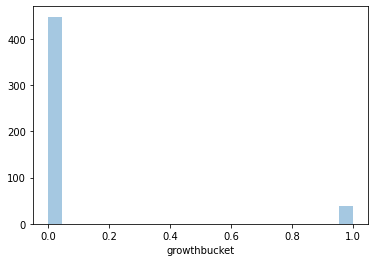

In [ ]:
sns.distplot(a=data.growthbucket, kde=False) 

**HEAT MAP**

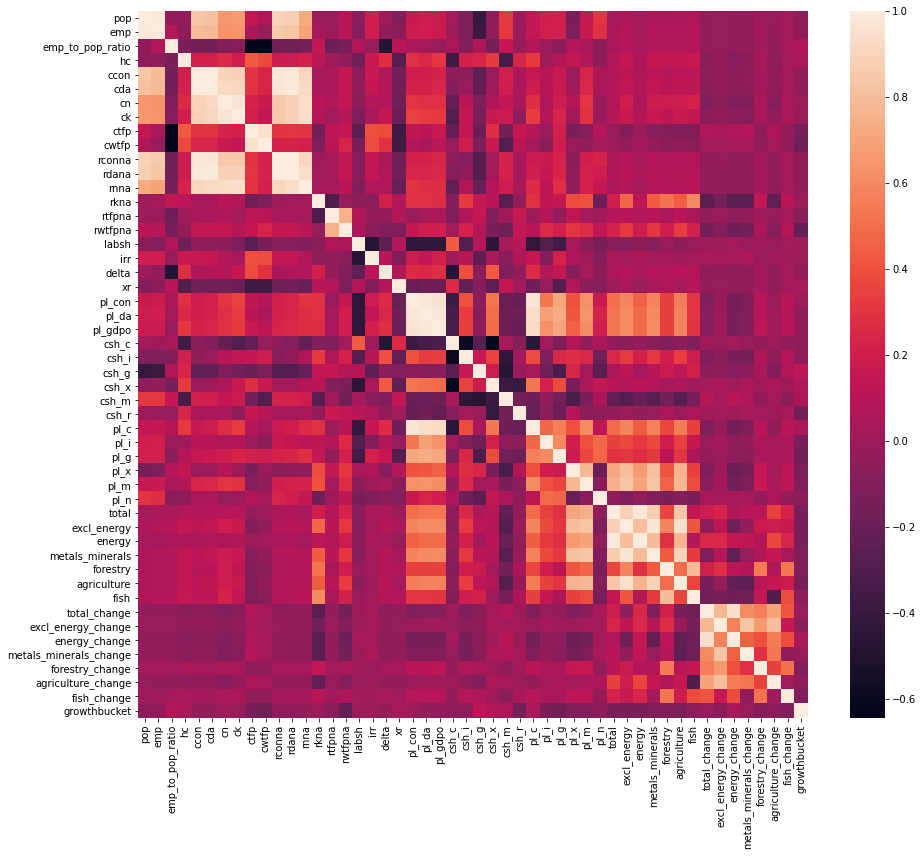

In [ ]:
plt.figure(figsize=(15, 13))
sns.heatmap(data=data.corr())

From the correlation matrix we could distinguish some feature clusters:
- [pl_c:fish] - represent price level
- [total_change:fish_change] - represent price level year-to-year change
- [ccon: mna] - correlation seem to be strong, but it's origin is unclear

We can now visualize some meaningful dependencies, using the correlations and what we know about a recession. This will include:
- rdana (since it represents total demand for all final marketed goods and services)
- emp 
- csh_g (government consumption)
- pl_c and total_change from clusters (to check how most of our data behaves)

In [ ]:
X_usampled, y_usampled = RandomUnderSampler(random_state=0).fit_resample(
    data.drop(columns=['growthbucket']), 
    data.growthbucket
)

under_X = pd.DataFrame(
    X_usampled, 
    columns=data.drop(columns=['growthbucket']).columns
)
under_y = pd.DataFrame(y_usampled, columns=['growthbucket'])
under_data = under_X.join(under_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Swarm Plot

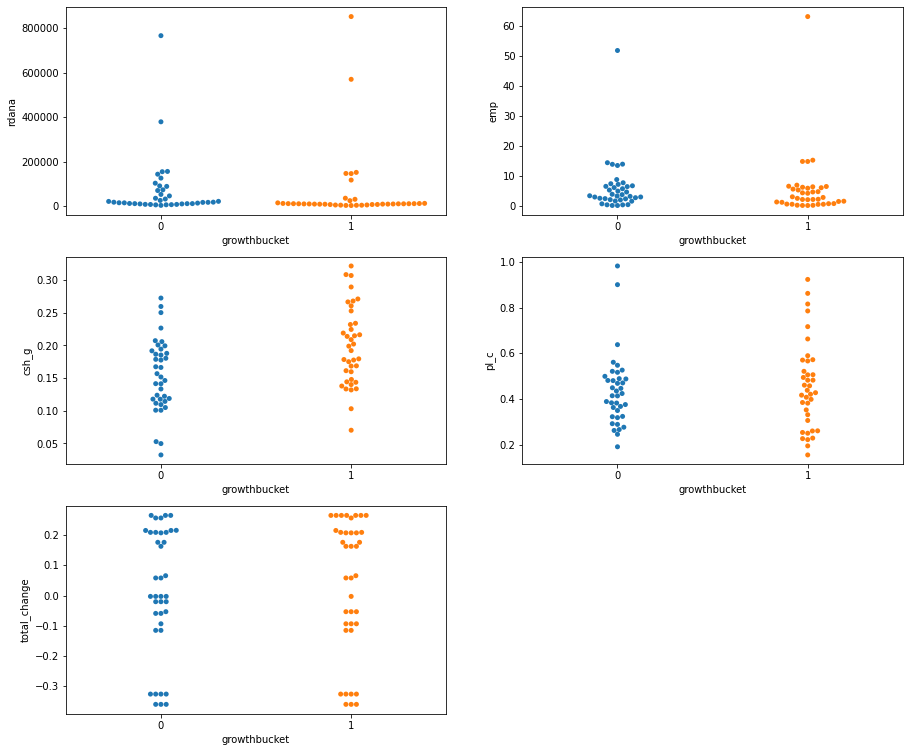

In [ ]:
plt.figure(figsize=(15, 13))

plt.subplot(3, 2, 1)
sns.swarmplot(x=under_data.growthbucket, y=under_data.rdana)

plt.subplot(3, 2, 2)
sns.swarmplot(x=under_data.growthbucket, y=under_data.emp)

plt.subplot(3, 2, 3)
sns.swarmplot(x=under_data.growthbucket, y=under_data.csh_g)

plt.subplot(3, 2, 4)
sns.swarmplot(x=under_data.growthbucket, y=under_data.pl_c)

plt.subplot(3, 2, 5)
sns.swarmplot(x=under_data.growthbucket, y=under_data.total_change)

At this point rdana, csh_g and pl_c looks the most interesting

#**Histogram**#

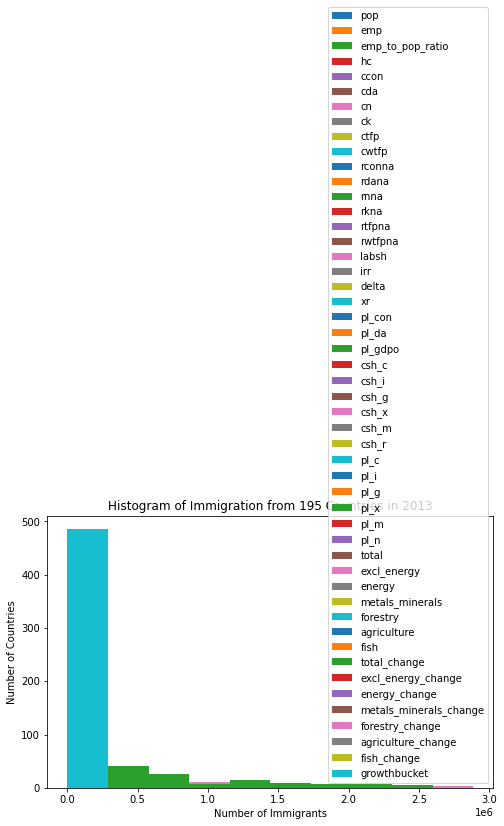

In [ ]:
df.plot(kind='hist', figsize=(8, 5))

plt.title('Histogram for african recession ') # add a title to the histogram
plt.ylabel('Frequency') # add y-label
plt.xlabel('') # add x-label

plt.show()

In [ ]:
import numpy as np
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df1.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df1.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

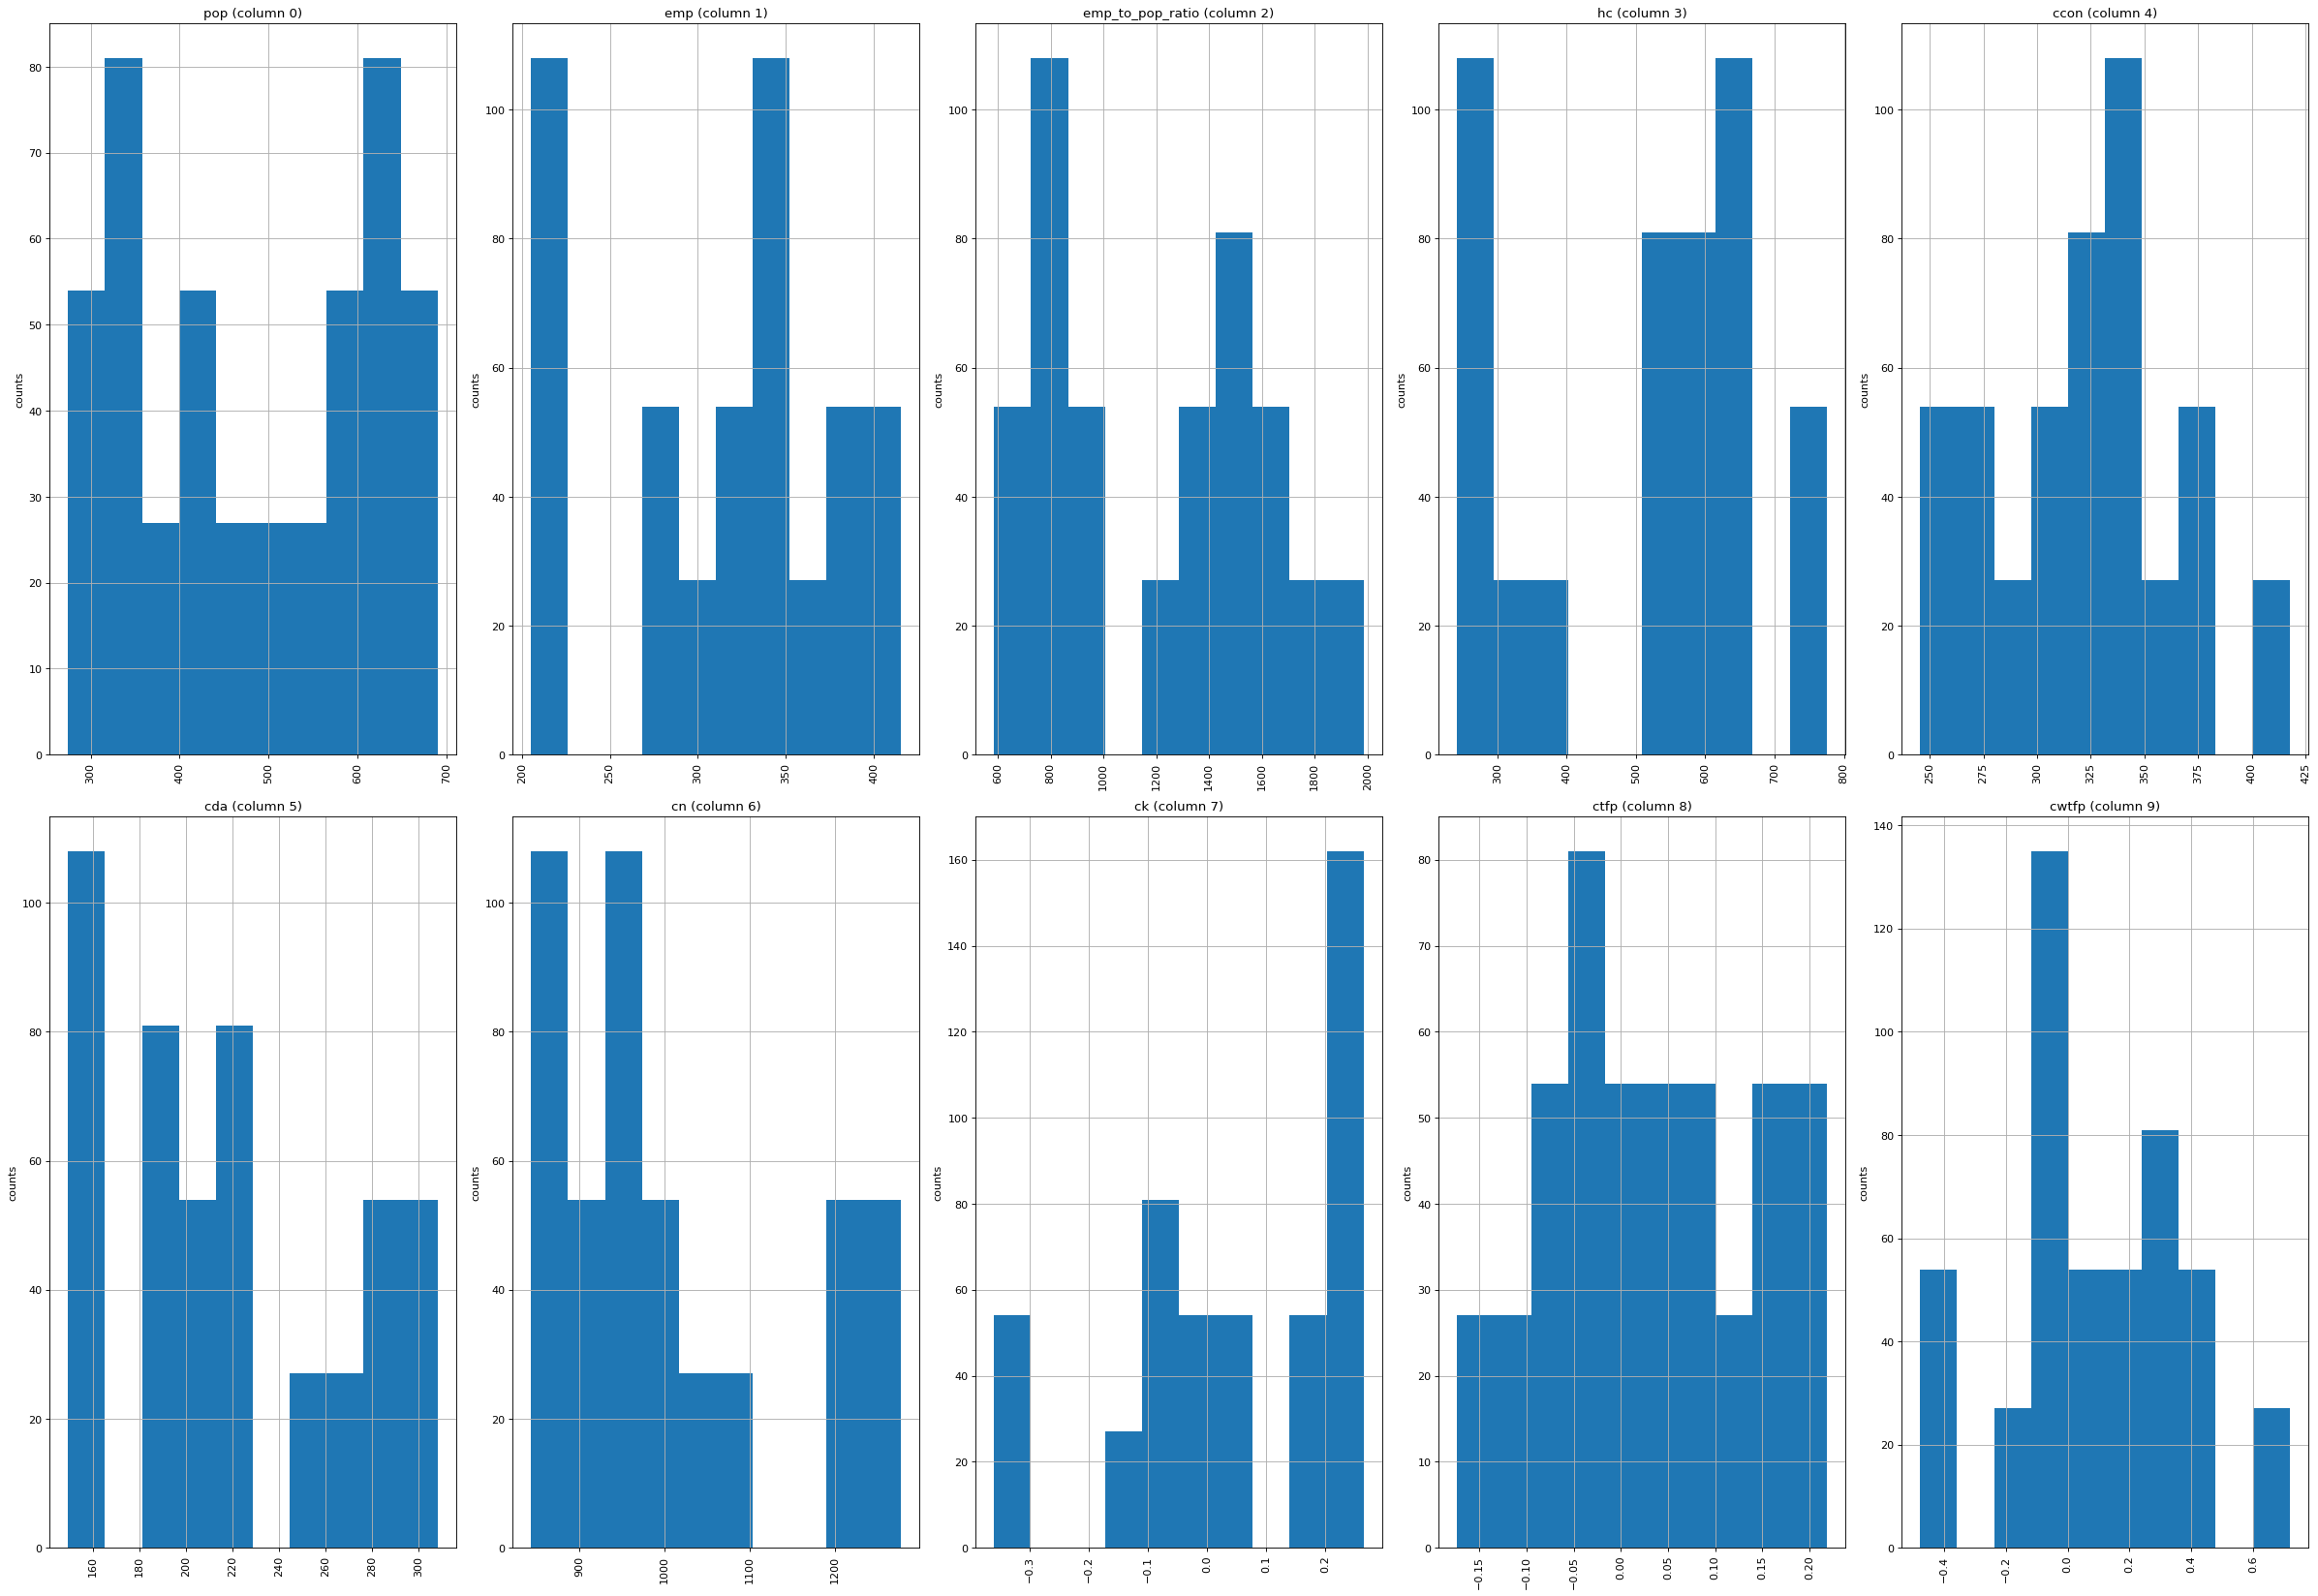

In [ ]:
plotPerColumnDistribution(df, 10, 5)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df2, plotSize, textSize):
    df2 = df2.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df2 = df2.dropna('columns')
    df2 = df2[[col for col in df2 if df2[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df2)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df2 = df2[columnNames]
    ax = pd.plotting.scatter_matrix(df2, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


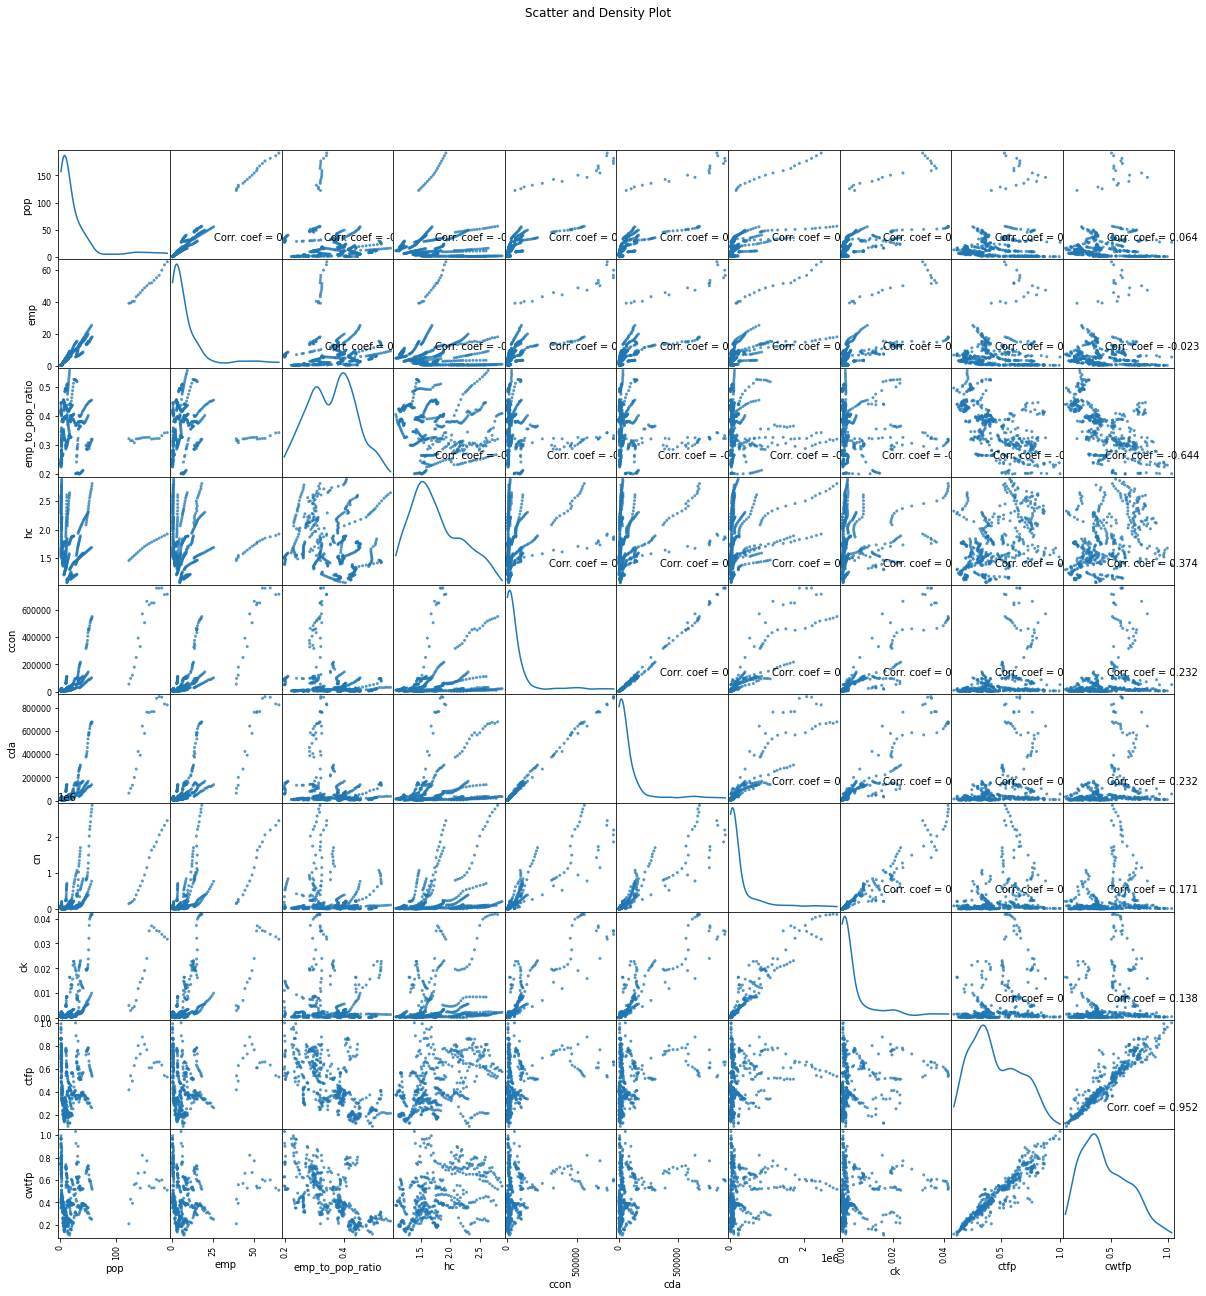

In [ ]:
plotScatterMatrix(df, 20, 10)